In [1]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

from scipy.stats import linregress

PATH_VARIABLES = "./variables"

# Umbral

In [2]:
luminancias = np.array([20, 20, 20, 20, 40, 40, 40, 40, 60, 60, 60, 60, 80, 80, 80, 80])
unique_luminancias = np.unique(luminancias)
unique_ruido_base = [0.01, 0.02, 0.03, 0.04]

colors = ['blue', 'green', 'orange', 'purple']  # Colores para los puntos y las rectas

In [3]:
mean_std_upv = np.load(PATH_VARIABLES+'/mean_std_upv.npy')
data_upv = np.load(PATH_VARIABLES+'/data_upv.npy')

mean_std_ugr = np.load(PATH_VARIABLES+'/mean_std_ugr.npy')
data_ugr = np.load(PATH_VARIABLES+'/data_ugr.npy')

mean_std_total = np.load(PATH_VARIABLES+'/mean_std_total.npy')
data_total = np.load(PATH_VARIABLES+'/data_total.npy')

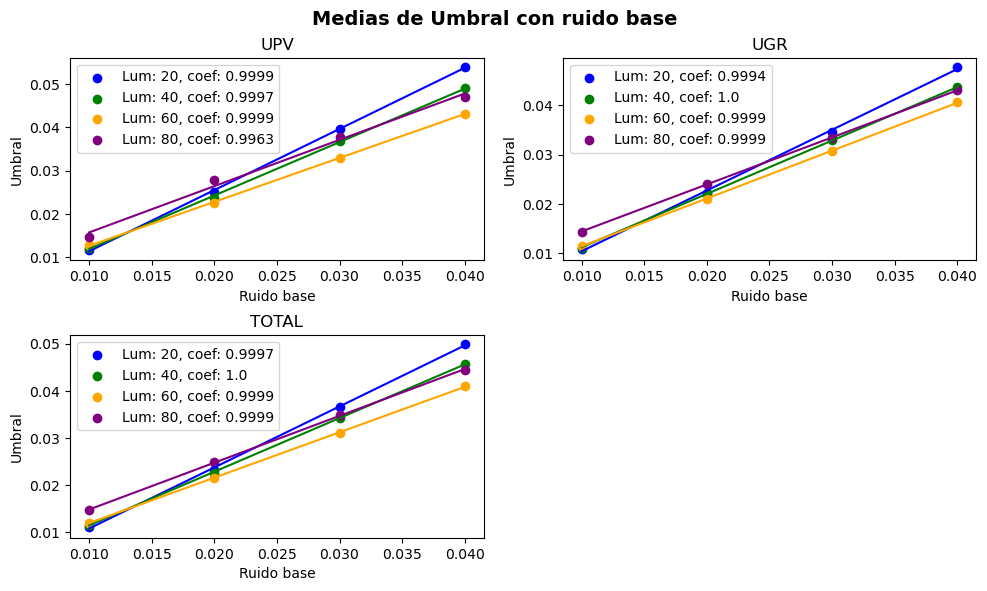

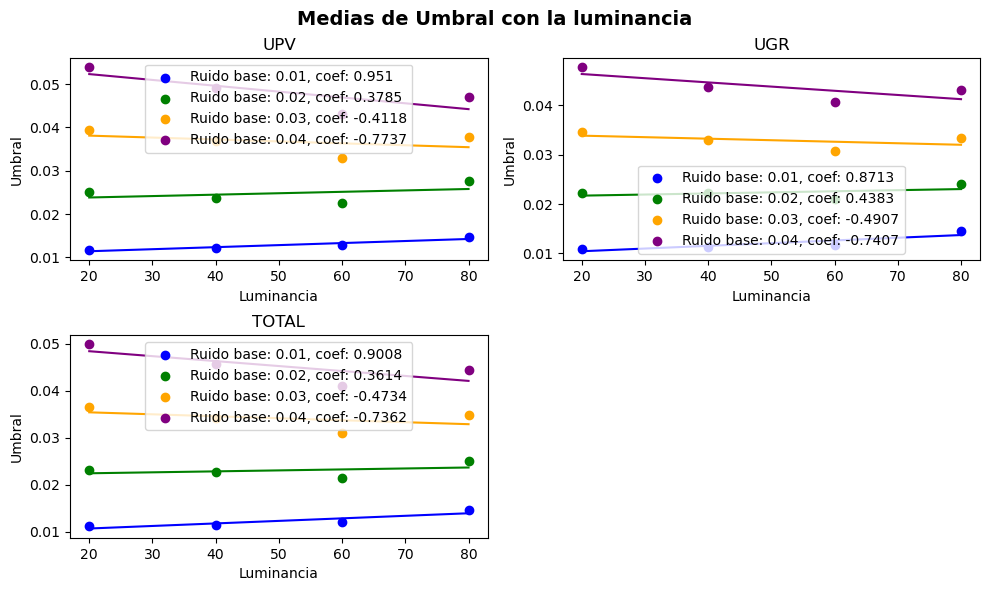

In [4]:
# Regresión de las medias y el ruido base

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

medias = np.array([i[1] for row in data_upv for i in row])
ruido_base = np.array([i[0] for row in data_upv for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_medias = medias[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_medias)

    # Graficar los resultados
    axs[0, 0].scatter(luminancia_ruido_base, luminancia_medias, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 0].set_title('UPV')
axs[0, 0].set_xlabel('Ruido base')
axs[0, 0].set_ylabel('Umbral')
axs[0, 0].legend()

medias = np.array([i[1] for row in data_ugr for i in row])
ruido_base = np.array([i[0] for row in data_ugr for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_medias = medias[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_medias)

    # Graficar los resultados
    axs[0, 1].scatter(luminancia_ruido_base, luminancia_medias, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 1].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 1].set_title('UGR')
axs[0, 1].set_xlabel('Ruido base')
axs[0, 1].set_ylabel('Umbral')
axs[0, 1].legend()

medias = np.array([i[1] for row in data_total for i in row])
ruido_base = np.array([i[0] for row in data_total for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_medias = medias[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_medias)

    # Graficar los resultados
    axs[1, 0].scatter(luminancia_ruido_base, luminancia_medias, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[1, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[1, 0].set_title('TOTAL')
axs[1, 0].set_xlabel('Ruido base')
axs[1, 0].set_ylabel('Umbral')
axs[1, 0].legend()

# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Medias de Umbral con ruido base", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

medias = np.array([i[1] for row in data_upv for i in row])
ruido_base = np.array([i[0] for row in data_upv for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_medias = medias[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_medias)

    # Graficar los resultados
    axs[0, 0].scatter(ruido_base_luminancias, ruido_base_medias, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 0].set_title('UPV'.format(ruido))
axs[0, 0].set_xlabel('Luminancia')
axs[0, 0].set_ylabel('Umbral') 
axs[0, 0].legend()

medias = np.array([i[1] for row in data_ugr for i in row])
ruido_base = np.array([i[0] for row in data_ugr for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_medias = medias[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_medias)

    # Graficar los resultados
    axs[0, 1].scatter(ruido_base_luminancias, ruido_base_medias, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 1].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 1].set_title('UGR'.format(ruido))
axs[0, 1].set_xlabel('Luminancia')
axs[0, 1].set_ylabel('Umbral') 
axs[0, 1].legend()

medias = np.array([i[1] for row in data_total for i in row])
ruido_base = np.array([i[0] for row in data_total for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_medias = medias[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_medias)

    # Graficar los resultados
    axs[1, 0].scatter(ruido_base_luminancias, ruido_base_medias, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[1, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[1, 0].set_title('TOTAL'.format(ruido))
axs[1, 0].set_xlabel('Luminancia')
axs[1, 0].set_ylabel('Umbral') 
axs[1, 0].legend()
# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Medias de Umbral con la luminancia", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()

# Diferencia de umbral

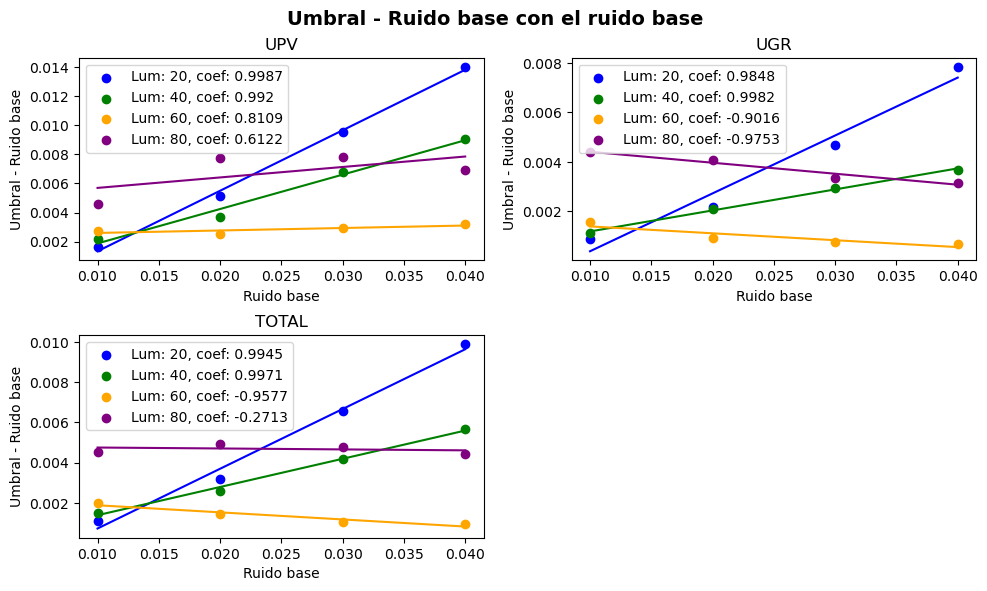

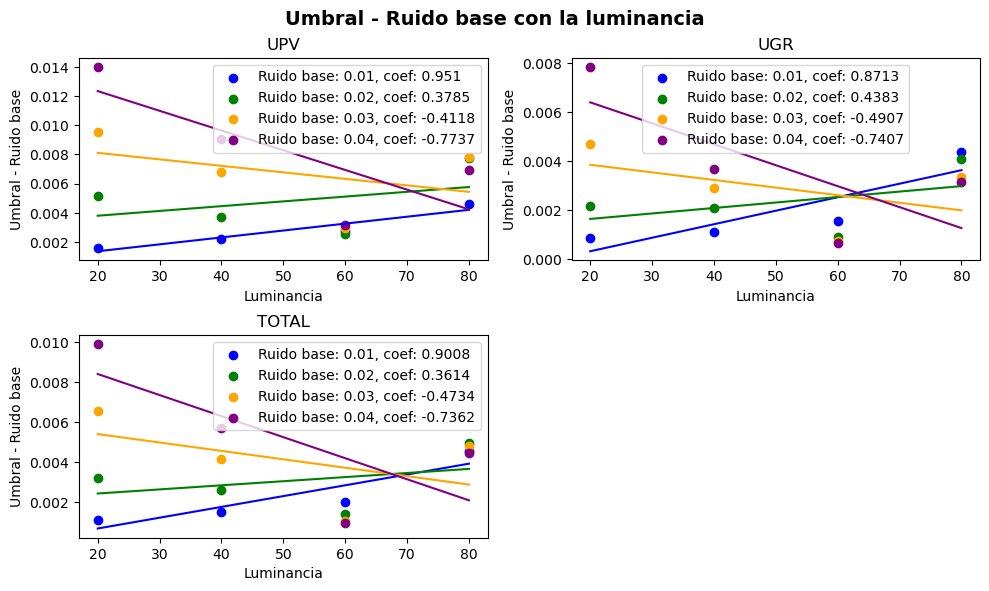

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

ruido_base = np.array([i[0] for row in data_upv for i in row])
dif_u_r = np.array([i[1]-i[0] for row in data_upv for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_diferencias = dif_u_r[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_diferencias)

    # Graficar los resultados
    axs[0, 0].scatter(luminancia_ruido_base, luminancia_diferencias, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 0].set_title('UPV')
axs[0, 0].set_xlabel('Ruido base')
axs[0, 0].set_ylabel('Umbral - Ruido base')
axs[0, 0].legend()

ruido_base = np.array([i[0] for row in data_ugr for i in row])
dif_u_r = np.array([i[1]-i[0] for row in data_ugr for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_diferencias = dif_u_r[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_diferencias)

    # Graficar los resultados
    axs[0, 1].scatter(luminancia_ruido_base, luminancia_diferencias, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 1].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 1].set_title('UGR')
axs[0, 1].set_xlabel('Ruido base')
axs[0, 1].set_ylabel('Umbral - Ruido base')
axs[0, 1].legend()

ruido_base = np.array([i[0] for row in data_total for i in row])
dif_u_r = np.array([i[1]-i[0] for row in data_total for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_diferencias = dif_u_r[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_diferencias)

    # Graficar los resultados
    axs[1, 0].scatter(luminancia_ruido_base, luminancia_diferencias, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[1, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[1, 0].set_title('TOTAL')
axs[1, 0].set_xlabel('Ruido base')
axs[1, 0].set_ylabel('Umbral - Ruido base')
axs[1, 0].legend()

# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Umbral - Ruido base con el ruido base", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

dif_u_r = np.array([i[1]-i[0] for row in data_upv for i in row])
ruido_base = np.array([i[0] for row in data_upv for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_diferencias = dif_u_r[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_diferencias)

    # Graficar los resultados
    axs[0, 0].scatter(ruido_base_luminancias, ruido_base_diferencias, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 0].set_title('UPV'.format(ruido))
axs[0, 0].set_xlabel('Luminancia')
axs[0, 0].set_ylabel('Umbral - Ruido base') 
axs[0, 0].legend()

dif_u_r = np.array([i[1]-i[0] for row in data_ugr for i in row])
ruido_base = np.array([i[0] for row in data_ugr for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_diferencias = dif_u_r[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_diferencias)

    # Graficar los resultados
    axs[0, 1].scatter(ruido_base_luminancias, ruido_base_diferencias, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 1].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 1].set_title('UGR'.format(ruido))
axs[0, 1].set_xlabel('Luminancia')
axs[0, 1].set_ylabel('Umbral - Ruido base') 
axs[0, 1].legend()

dif_u_r = np.array([i[1]-i[0] for row in data_total for i in row])
ruido_base = np.array([i[0] for row in data_total for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_diferencias = dif_u_r[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_diferencias)

    # Graficar los resultados
    axs[1, 0].scatter(ruido_base_luminancias, ruido_base_diferencias, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[1, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[1, 0].set_title('TOTAL'.format(ruido))
axs[1, 0].set_xlabel('Luminancia')
axs[1, 0].set_ylabel('Umbral - Ruido base') 
axs[1, 0].legend()
# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Umbral - Ruido base con la luminancia", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()

# Ley de Weber
Constante = Diferencia del umbral y el ruido base entre el ruido base
$$ k = \frac{u-r}{r}$$

[0.1607  0.2582  0.3174  0.34985]
[0.2196 0.184  0.2262 0.2257]
[0.2747     0.1276     0.09776667 0.079625  ]
[0.4579     0.38625    0.26116667 0.173375  ]


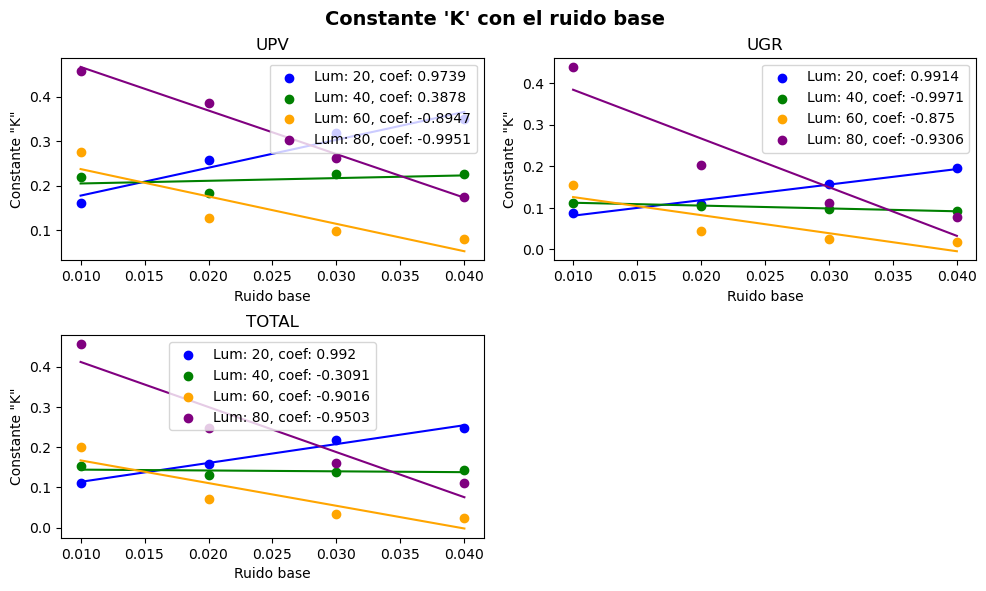

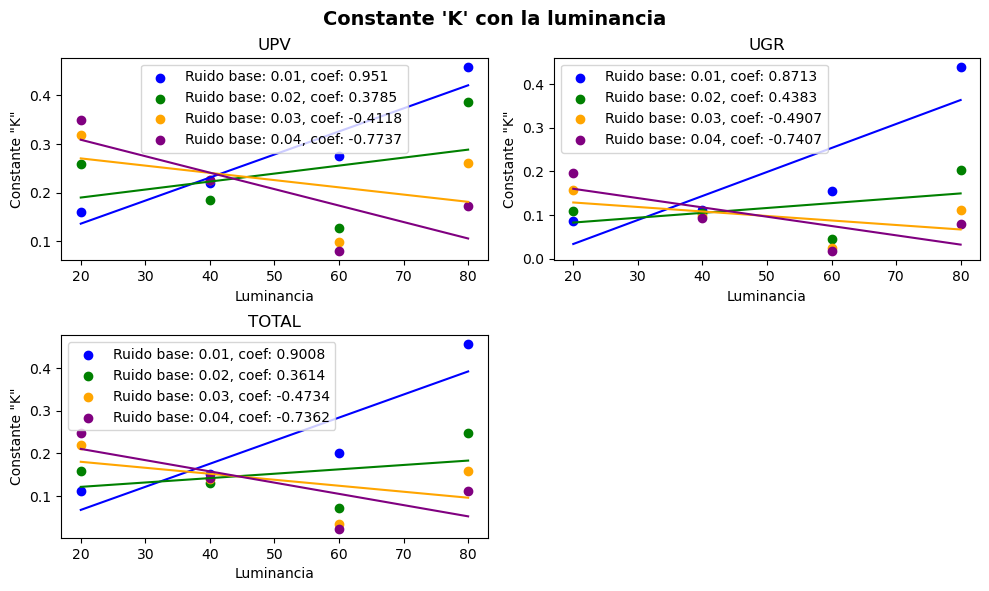

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

ruido_base = np.array([i[0] for row in data_upv for i in row])
k = np.array([((i[1]-i[0])/i[0]) for row in data_upv for i in row])
for k_fila in [row for row in [k[i:i+4] for i in range(0, 16, 4)]]:
    print(k_fila)

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_k = k[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_k)

    # Graficar los resultados
    axs[0, 0].scatter(luminancia_ruido_base, luminancia_k, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 0].set_title('UPV')
axs[0, 0].set_xlabel('Ruido base')
axs[0, 0].set_ylabel('Constante "K"')
axs[0, 0].legend()

ruido_base = np.array([i[0] for row in data_ugr for i in row])
k = np.array([((i[1]-i[0])/i[0]) for row in data_ugr for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_k = k[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_k)

    # Graficar los resultados
    axs[0, 1].scatter(luminancia_ruido_base, luminancia_k, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 1].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 1].set_title('UGR')
axs[0, 1].set_xlabel('Ruido base')
axs[0, 1].set_ylabel('Constante "K"')
axs[0, 1].legend()

ruido_base = np.array([i[0] for row in data_total for i in row])
k = np.array([((i[1]-i[0])/i[0]) for row in data_total for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_k = k[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_k)

    # Graficar los resultados
    axs[1, 0].scatter(luminancia_ruido_base, luminancia_k, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[1, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[1, 0].set_title('TOTAL')
axs[1, 0].set_xlabel('Ruido base')
axs[1, 0].set_ylabel('Constante "K"')
axs[1, 0].legend()

# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Constante 'K' con el ruido base", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

ruido_base = np.array([i[0] for row in data_upv for i in row])
k = np.array([((i[1]-i[0])/i[0]) for row in data_upv for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_k = k[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_k)

    # Graficar los resultados
    axs[0, 0].scatter(ruido_base_luminancias, ruido_base_k, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 0].set_title('UPV'.format(ruido))
axs[0, 0].set_xlabel('Luminancia')
axs[0, 0].set_ylabel('Constante "K"') 
axs[0, 0].legend()

ruido_base = np.array([i[0] for row in data_ugr for i in row])
k = np.array([((i[1]-i[0])/i[0]) for row in data_ugr for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_k = k[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_k)

    # Graficar los resultados
    axs[0, 1].scatter(ruido_base_luminancias, ruido_base_k, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 1].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 1].set_title('UGR'.format(ruido))
axs[0, 1].set_xlabel('Luminancia')
axs[0, 1].set_ylabel('Constante "K"') 
axs[0, 1].legend()

ruido_base = np.array([i[0] for row in data_total for i in row])
k = np.array([((i[1]-i[0])/i[0]) for row in data_total for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_k = k[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_k)

    # Graficar los resultados
    axs[1, 0].scatter(ruido_base_luminancias, ruido_base_k, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[1, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[1, 0].set_title('TOTAL'.format(ruido))
axs[1, 0].set_xlabel('Luminancia')
axs[1, 0].set_ylabel('Constante "K"') 
axs[1, 0].legend()
# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Constante 'K' con la luminancia", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()

# Desviación típica

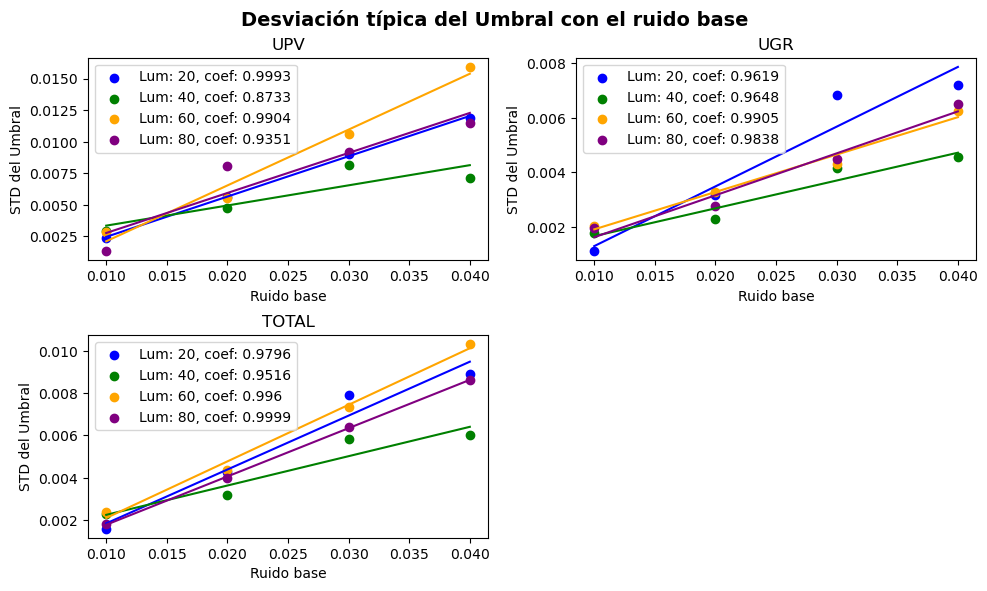

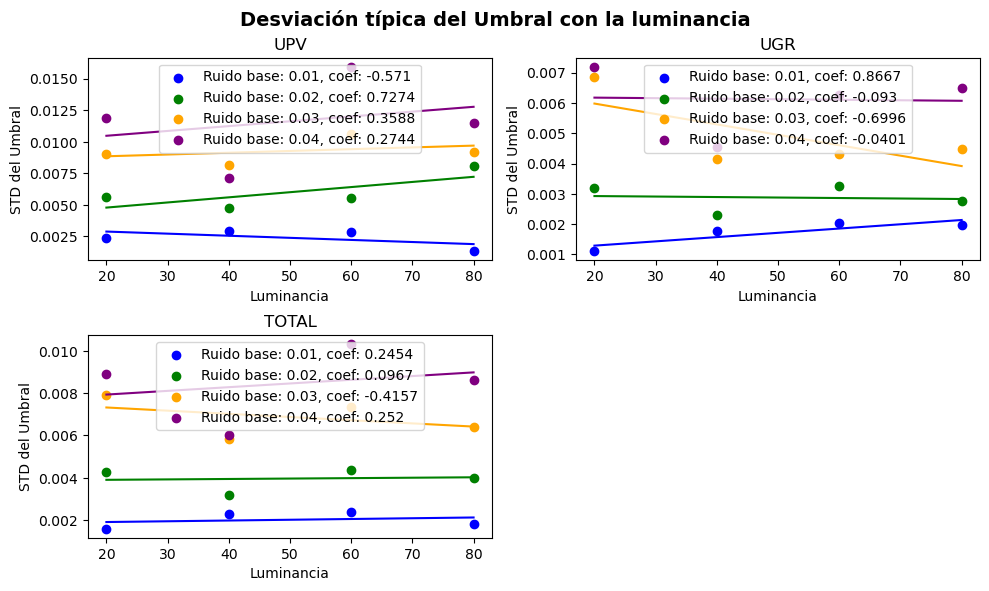

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

ruido_base = np.array([i[0] for row in data_upv for i in row])
std = np.array([i[2] for row in data_upv for i in row])


for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_std = std[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_std)

    # Graficar los resultados
    axs[0, 0].scatter(luminancia_ruido_base, luminancia_std, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 0].set_title('UPV')
axs[0, 0].set_xlabel('Ruido base')
axs[0, 0].set_ylabel('STD del Umbral')
axs[0, 0].legend()

ruido_base = np.array([i[0] for row in data_ugr for i in row])
std = np.array([i[2] for row in data_ugr for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_std = std[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_std)

    # Graficar los resultados
    axs[0, 1].scatter(luminancia_ruido_base, luminancia_std, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[0, 1].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[0, 1].set_title('UGR')
axs[0, 1].set_xlabel('Ruido base')
axs[0, 1].set_ylabel('STD del Umbral')
axs[0, 1].legend()

ruido_base = np.array([i[0] for row in data_total for i in row])
std = np.array([i[2] for row in data_total for i in row])

for i, luminancia in enumerate(unique_luminancias):
    # Filtrar datos correspondientes a la luminancia actual
    luminancia_indices = np.where(luminancias == luminancia)
    luminancia_ruido_base = ruido_base[luminancia_indices]
    luminancia_std = std[luminancia_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(luminancia_ruido_base, luminancia_std)

    # Graficar los resultados
    axs[1, 0].scatter(luminancia_ruido_base, luminancia_std, color=colors[i], label="Lum: {}, coef: {}".format(luminancia, round(r_value,4)))
    axs[1, 0].plot(luminancia_ruido_base, intercept + slope * luminancia_ruido_base, color=colors[i])
    
axs[1, 0].set_title('TOTAL')
axs[1, 0].set_xlabel('Ruido base')
axs[1, 0].set_ylabel('STD del Umbral')
axs[1, 0].legend()

# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Desviación típica del Umbral con el ruido base", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(10, 6))

ruido_base = np.array([i[0] for row in data_upv for i in row])
std = np.array([i[2] for row in data_upv for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_std = std[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_std)

    # Graficar los resultados
    axs[0, 0].scatter(ruido_base_luminancias, ruido_base_std, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 0].set_title('UPV'.format(ruido))
axs[0, 0].set_xlabel('Luminancia')
axs[0, 0].set_ylabel('STD del Umbral') 
axs[0, 0].legend()

ruido_base = np.array([i[0] for row in data_ugr for i in row])
std = np.array([i[2] for row in data_ugr for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_std = std[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_std)
    
    # Graficar los resultados
    axs[0, 1].scatter(ruido_base_luminancias, ruido_base_std, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[0, 1].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[0, 1].set_title('UGR'.format(ruido))
axs[0, 1].set_xlabel('Luminancia')
axs[0, 1].set_ylabel('STD del Umbral') 
axs[0, 1].legend()

ruido_base = np.array([i[0] for row in data_total for i in row])
std = np.array([i[2] for row in data_total for i in row])

# Realizar regresión por cada nivel de ruido base
for i, ruido in enumerate(unique_ruido_base):
    # Filtrar datos correspondientes al ruido base actual
    ruido_base_indices = np.where(ruido_base == ruido)
    ruido_base_luminancias = luminancias[ruido_base_indices]
    ruido_base_std = std[ruido_base_indices]

    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(ruido_base_luminancias, ruido_base_std)

    # Graficar los resultados
    axs[1, 0].scatter(ruido_base_luminancias, ruido_base_std, color=colors[i], label="Ruido base: {}, coef: {}".format(ruido, round(r_value,4)))
    axs[1, 0].plot(ruido_base_luminancias, intercept + slope * ruido_base_luminancias, color=colors[i])

axs[1, 0].set_title('TOTAL'.format(ruido))
axs[1, 0].set_xlabel('Luminancia')
axs[1, 0].set_ylabel('STD del Umbral') 
axs[1, 0].legend()
# Remover el último subplot vacío
fig.delaxes(axs[1, 1])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Ajustar los espacios entre subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

fig.suptitle("Desviación típica del Umbral con la luminancia", fontsize=14, fontweight='bold')

# Mostrar la figura
plt.show()